In [45]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [46]:
df1 = pd.read_csv('../Li_elements_2/chemical_space/Li_Si.csv')
df2 = pd.read_csv('../K_comp/chemical_space/K_Si.csv')

df1 = df1[['Result_1','Structure_SG','Anion Site']]
df2 = df2[['Result_1','Structure_SG','Anion Site']]

df1.sort_values(by=['Anion Site','Result_1'], ascending=[True,False], inplace=True)
df2.sort_values(by=['Anion Site','Result_1'], ascending=[True,False], inplace=True)

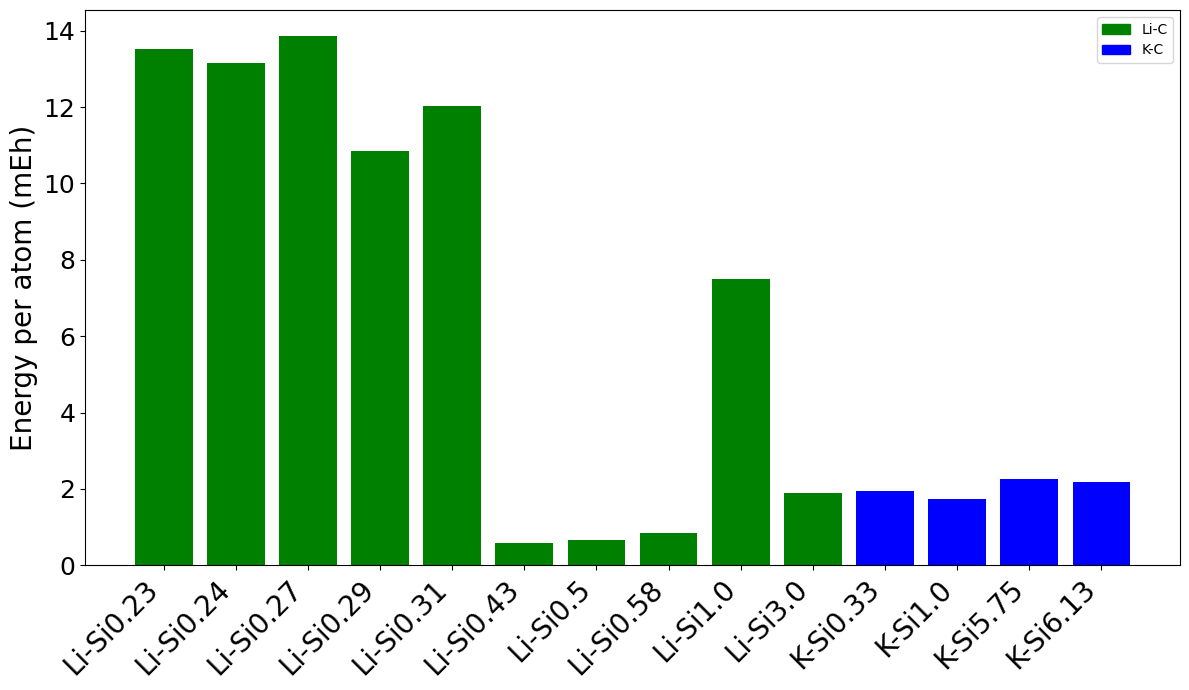

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

# Label the origin of each DataFrame
df1['Label'] = 'Li-C'
df2['Label'] = 'K-C'

# Combine the DataFrames
df_combined = pd.concat([df1, df2])

# df_combined.sort_values(by=['Anion Site','Result_1'], ascending=[True,False], inplace=True)
# Create a unique label for each structure
df_combined['Structure'] = df_combined['Structure_SG'].astype(str)

# Map colors based on the Label
color_map = {'Li-C': 'green', 'K-C': 'blue'}
colors = df_combined['Label'].map(color_map)

# Plotting
plt.figure(figsize=(12, 7))
plt.bar(df_combined['Structure'], df_combined['Result_1'], color=colors)

plt.xticks(rotation=45, ha='right', fontsize=20)
plt.yticks(fontsize=18)
plt.ylabel("Energy per atom (mEh)", fontsize=20)

# Add legend
handles = [plt.Rectangle((0,0),1,1, color=color_map[label]) for label in color_map]
labels = list(color_map.keys())
plt.legend(handles, labels)

# plt.savefig('chemical_space/lic_kc.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


In [48]:
df_combined

,Result_1,Structure_SG,Anion Site,Label,Structure
0,13.518213,Li-Si0.23,0.23,Li-C,Li-Si0.23
1,13.140352,Li-Si0.24,0.24,Li-C,Li-Si0.24
2,13.847690,Li-Si0.27,0.27,Li-C,Li-Si0.27
3,10.837360,Li-Si0.29,0.29,Li-C,Li-Si0.29
4,12.034944,Li-Si0.31,0.31,Li-C,Li-Si0.31
5,0.592535,Li-Si0.43,0.43,Li-C,Li-Si0.43
6,0.676246,Li-Si0.5,0.50,Li-C,Li-Si0.5
7,0.836953,Li-Si0.58,0.58,Li-C,Li-Si0.58
8,7.509397,Li-Si1.0,1.00,Li-C,Li-Si1.0
9,1.197946,Li-Si1.0,1.00,Li-C,Li-Si1.0


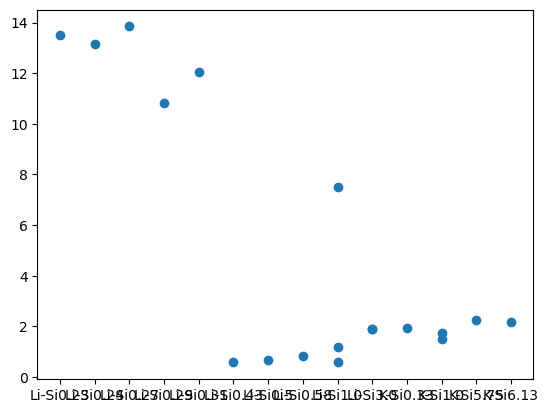

In [49]:
plt.plot(df_combined['Structure'], df_combined['Result_1'], 'o')

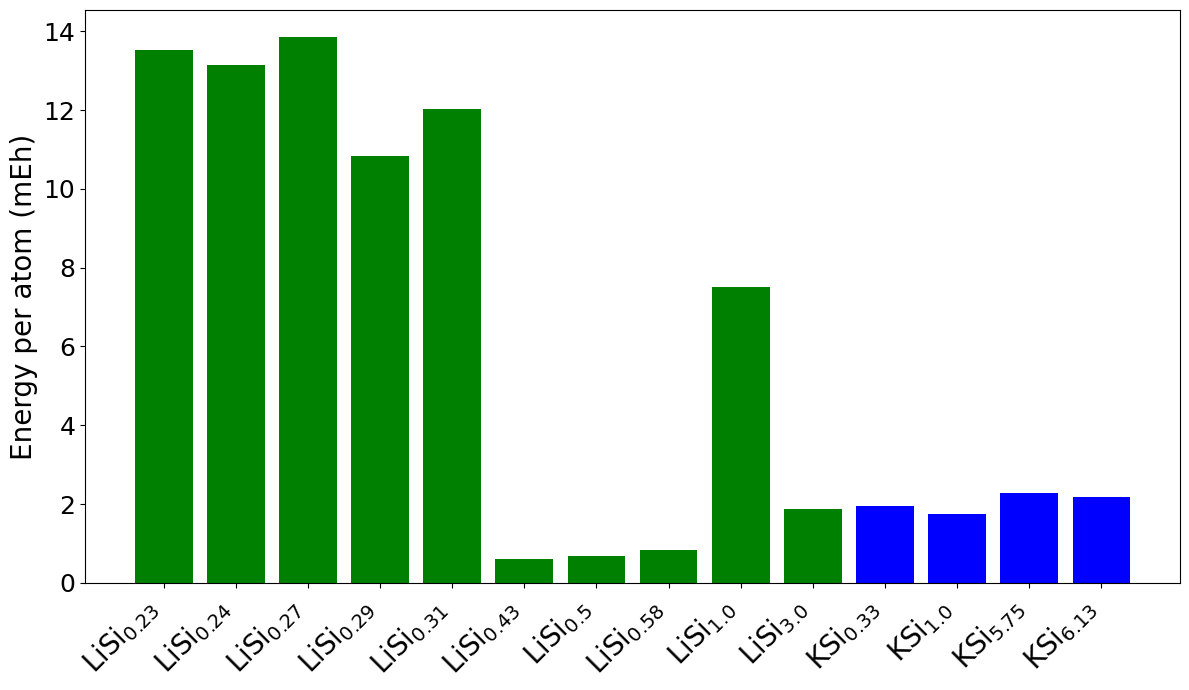

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# --- your existing data load & label logic ---
# df1, df2 already have a column 'Structure_SG' like "Li-C0.33" and a numeric column 'CN'
df1['Label'] = 'Li-Si'
df2['Label'] = 'K-Si'
df_combined = pd.concat([df1, df2], ignore_index=True)

# create a display string for each bar:
# split the Label on '-' to get the metal symbol, append 'O', subscript the CN
def make_label(row):
    metal = row['Label'].split('-')[0]    # "Li" or "K"
    cn = row['Anion Site']                        # e.g. 0.33
    # use \mathrm{} to keep the letters upright in math mode
    return rf"$\mathrm{{{metal}Si}}_{{{cn}}}$"

df_combined['DispLabel'] = df_combined.apply(make_label, axis=1)

# now plot
plt.figure(figsize=(12, 7))
bars = plt.bar(df_combined['DispLabel'], df_combined['Result_1'],
               color=df_combined['Label'].map({'Li-Si':'green','K-Si':'blue'}))

# set the ticks to your new labels (they’re already strings with $…$)
plt.xticks(rotation=45, ha='right', fontsize=20)
plt.yticks(fontsize=18)
plt.ylabel("Energy per atom (mEh)", fontsize=20)

# legend
handles = [plt.Rectangle((0,0),1,1,color=c) 
           for c in ['green','blue']]
# labels  = ['Li–O','K–O']
# plt.legend(handles, labels)

plt.savefig('chemical_space/liSi_kSi.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()
